# Logistic Regression

Logistic regression is a supervised learning algorithm used for classification. Here, we will apply the logistic regression algorithm from scratch on university admission dataset and compare the results with the results from scikit-learn model.

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing Data
data = pd.read_csv('binary1.CSV')

In [3]:
#looking at the 1st five elements of the data
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [4]:
data.info()            #geting the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit    400 non-null int64
gre      400 non-null int64
gpa      400 non-null float64
rank     400 non-null int64
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


In [5]:
data.describe()         #getting some more info about the dataset

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [6]:
data.isnull().sum()         #checking if there is any nan values in the data

admit    0
gre      0
gpa      0
rank     0
dtype: int64

In [7]:
data.groupby('admit').mean()        #to the get the mean values of features for acceptance and non acceptance

,gre,gpa,rank
admit,,,
0,573.186813,3.343700,2.641026
1,618.897638,3.489213,2.149606


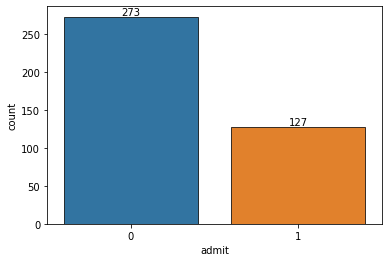

In [8]:
#Data visualization for number of admits and non admits
plt.figure(figsize=(6,4))

ax = sns.countplot(x = 'admit', data = data,linewidth = 0.75, edgecolor = "black")
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}'.format(y), (x.mean(), y), ha='center', va='bottom')
plt.show();

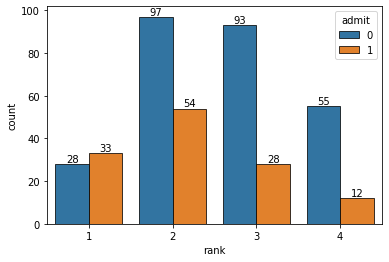

In [9]:
#Data Visualization for admits according to rank
ncount = len(data)
ax = sns.countplot(x="rank",  hue="admit", data=data, linewidth = 0.75, edgecolor = "black")
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}'.format(y), (x.mean(), y), ha='center', va='bottom')

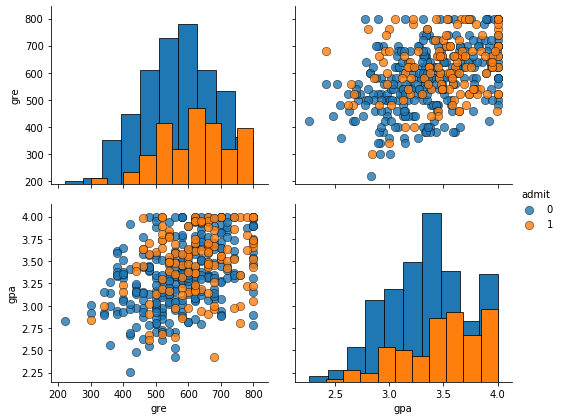

In [10]:
#pair plot describing distribution of data between gre score nad gpa score
ax = sns.PairGrid(data, hue = "admit", vars = ["gre", "gpa"], height = 3, aspect = 1.2)
ax.map_diag(plt.hist, linewidth = 0.75, edgecolor = "black")
ax.map_offdiag(plt.scatter, s = 70, linewidth  = 0.5, edgecolor = "black", alpha = 0.8)
ax.add_legend();

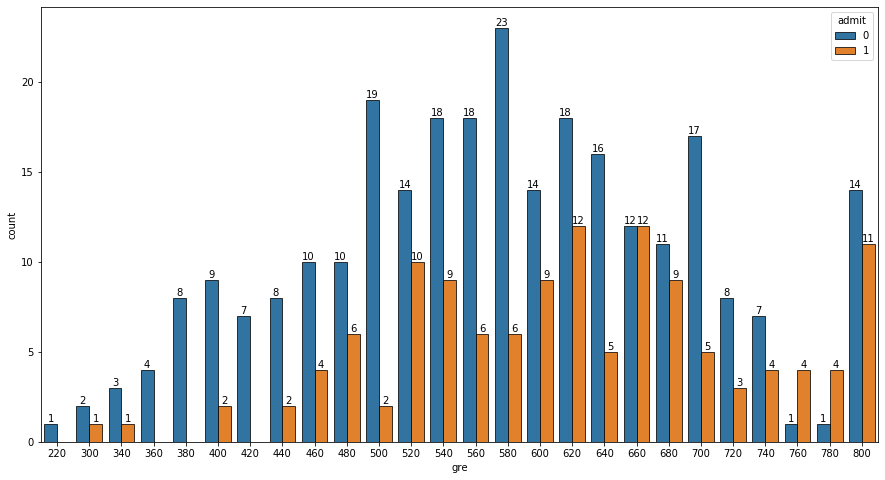

In [11]:
#visualization of acceptance according to gre score
ncount = len(data)
plt.figure(figsize=(15,8))
ax = sns.countplot(x = 'gre', hue = 'admit', data = data, linewidth = 0.75, edgecolor = "black")
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}'.format(y), (x.mean(), y), ha='center', va='bottom')

In [12]:
#deviding the dataset into training and test data set randomly
i = np.random.rand(len(data)) < 0.8
train = data[i]
test  = data[~i]
print("Shape of the training set: " + str(train.shape))
print("Shape of the test set: " + str(test.shape))

Shape of the training set: (328, 4)
Shape of the test set: (72, 4)


In [13]:
#adding extra column for intercept
x_train = train.drop(columns = "admit")
k = 0
x_train.insert(loc = k, column = 'W0', value = 1)
y_train = pd.DataFrame(train["admit"])

In [14]:
x_train.head()

,W0,gre,gpa,rank
0,1,380,3.61,3
1,1,660,3.67,3
3,1,640,3.19,4
5,1,760,3.00,2
6,1,560,2.98,1


In [15]:
#creating sigmoid function
def sigmoid(z):
    """Getting input and returning value 1/(1+e^(-z))"""
    return 1/(1+np.exp(-z))


In [16]:
#Getting 1st Derivative
def d_f1(X, theta, y):
    z = np.dot(X, theta)
    return np.dot(X.T, (sigmoid(z) - y_train))/(y.size)

In [17]:
#Getting 2nd derivative hessian matrix
def d_f2(X, theta, y):
    z = np.dot(X, theta)
    h = sigmoid(z)
    b = h*(1-h)
    A = np.zeros((b.size, b.size))
    np.fill_diagonal(A, h*(1-h))
    return -np.dot(np.dot(X.T, A), X)/(y.size)

In [18]:
#calculating the cost function for logistic regression
def cost_function(X, theta, y):
    z = np.dot(X, theta)
    h = sigmoid(z)
    e = -(y*np.log(h) + (1 - y)*np.log(1-h))
    c = (1/int(y.size)) * (e.values.sum())
    return c

In [19]:
#initialization for parameters
theta = pd.DataFrame(np.zeros(x_train.shape[1]))

In [20]:
learning_rate = 0.1
maxIter = 200
J = []

In [21]:
#fitting parameters through optimization
for k in range(maxIter):
    grad1 = d_f1(x_train, theta, y_train)
    grad2 = d_f2(x_train, theta, y_train)
    if np.linalg.cond(grad2) < 1/sys.float_info.epsilon:      # checking singularity of a matrix
        H = np.linalg.inv(grad2)
        theta += learning_rate* np.dot(H, grad1)
        cost = cost_function(x_train, theta, y_train)
        J.append(cost)
    else:
        break

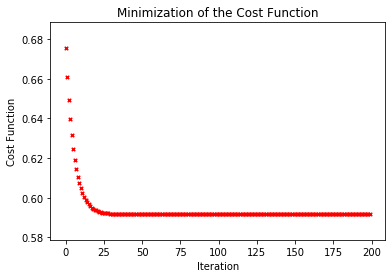

In [22]:
#plotting cost function
x = range(maxIter)
plt.scatter(x, J, c = 'r', s = 12, marker = 'x')
plt.ylabel('Cost Function')
plt.xlabel('Iteration')
plt.title('Minimization of the Cost Function')
plt.show();

In [23]:
#creating test data sets
x_test = test.drop(columns = 'admit')
k = 0
x_test.insert(loc = k, column = 'W0', value = 1)
y_test = test['admit']

In [24]:
#Prediction
z = np.dot(x_test, theta)
y_predict = []
for i in z:
    if i>0:
        y_predict.append(1)
    else:
        y_predict.append(0)
y_predict = np.array(y_predict)

In [25]:
#storing prediction in a DataFrame
output = pd.DataFrame({"test": y_test, "predict": y_predict})
output = output.reset_index()
#Accuracy calculation
b = (pd.DataFrame(y_predict)).where((pd.DataFrame(y_predict).values)==pd.DataFrame(y_test).values).dropna()
acc = b.size/y_test.size
print("The Accuracy is: " + str(100*acc) + "%")

The Accuracy is: 81.94444444444444%


In [26]:
#importing logistic regression model from sklearn 
from sklearn.linear_model import LogisticRegression

In [27]:
#creating the classifier instance and fitting the data
clf = LogisticRegression()
clf.fit(x_train, y_train);

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
#Predicting 
predictions = clf.predict(x_test)
score = clf.score(x_test, y_test)
print("The Accuracy is: " + str(100*score) + "%")

The Accuracy is: 79.16666666666666%


In [29]:
#storing in a Dataframe for comparision
Output = pd.DataFrame({"test": y_test, "predict": y_predict, "skl_pred":predictions })
#Output = Output.reset_index()
Output.head()

,test,predict,skl_pred
2,1,1,1
4,0,0,0
23,0,0,0
39,1,0,0
44,0,0,0
